<a href="https://colab.research.google.com/github/AlcidesChewe/TF_MENSAJES_NEGATIVOS/blob/main/TF_AplicacionesDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('messages.csv', nrows=35000, header=0, error_bad_lines=False, encoding="ISO-8859-1")

<ipython-input-36-5a11b6f85d14>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('messages.csv', nrows=35000, header=0, error_bad_lines=False, encoding="ISO-8859-1")
Skipping line 32000: expected 6 fields, saw 7



In [37]:
print(df.head())

             AuthorID        Author             Date Content Attachments  \
0  456226577798135808  Deleted User  2021/09/01 2:14   ok so         NaN   
1  456226577798135808  Deleted User  2021/09/01 2:14    wait         NaN   
2  456226577798135808  Deleted User  2021/09/01 2:14     wtf         NaN   
3  456226577798135808  Deleted User  2021/09/01 2:14     LOL         NaN   
4  456226577798135808  Deleted User  2021/09/01 2:14  HAHAHA         NaN   

                                           Reactions  
0  ð¿ (2),ð´ (2),ð¸ (2),ð° (2),ðª (2),â...  
1  ð¿ (1),ð´ (1),ð¸ (1),ð° (1),ðª (1),â...  
2  ð¿ (1),ð´ (1),ð¸ (1),ð° (1),ðª (1),â...  
3  ð¿ (2),ð´ (1),ð¸ (1),ð° (1),ðª (1),â...  
4  ð¿ (1),ð´ (1),ð¸ (1),ð° (1),ðª (1),â...  


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AuthorID     35000 non-null  int64 
 1   Author       35000 non-null  object
 2   Date         35000 non-null  object
 3   Content      34289 non-null  object
 4   Attachments  645 non-null    object
 5   Reactions    719 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB
None


In [39]:
print(df.describe())

           AuthorID
count  3.500000e+04
mean   5.181251e+17
std    1.620007e+17
min    1.132247e+17
25%    4.562266e+17
50%    4.562266e+17
75%    6.453437e+17
max    8.882762e+17


In [40]:
#sns.countplot(x='Author', data=df)
#plt.xticks(rotation=90)
#plt.show()

In [42]:
print(df['Content'].iloc[1411])


i unbanned


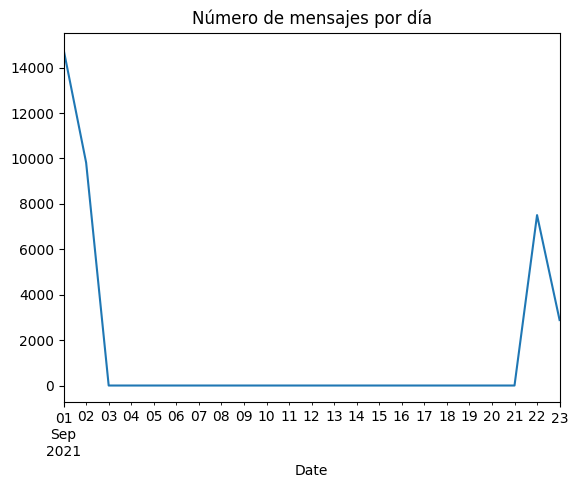

In [43]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.resample('D').size().plot()
plt.title('Número de mensajes por día')
plt.show()

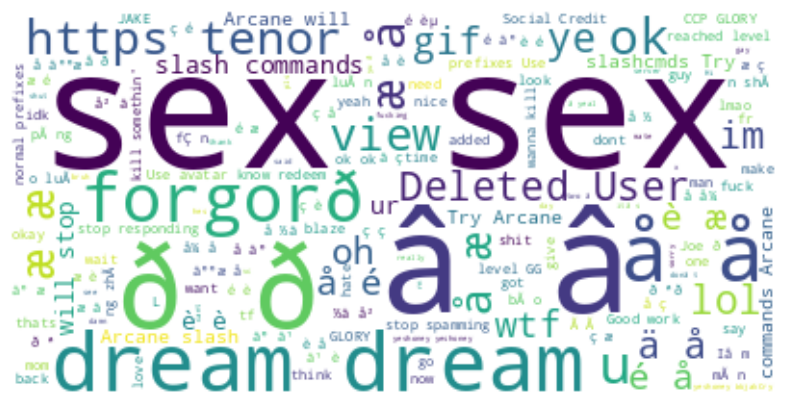

In [44]:
# Generar una nube de palabras con el contenido de los mensajes
text = ' '.join(df['Content'].dropna().tolist())
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
import pandas as pd
import re
from collections import defaultdict

# Inicializa un diccionario para contar las reacciones
reactions_count = defaultdict(int)

# Función para procesar cada fila de la columna Reactions
def process_reactions(row):
    if pd.notnull(row):
        # Encuentra todos los emojis y sus conteos
        reactions = re.findall(r'([^\x00-\x7F]+)\s\((\d+)\)', row)
        for emoji, count in reactions:
            reactions_count[emoji] += int(count)

# Aplica la función a cada fila de la columna 'Reactions'
df['Reactions'].apply(process_reactions)

# Ahora tienes un diccionario con la suma de cada emoji como clave y su conteo total como valor
print(reactions_count)

defaultdict(<class 'int'>, {'ð\x9f\x87¿': 8, 'ð\x9f\x87´': 7, 'ð\x9f\x87¸': 7, 'ð\x9f\x87°': 7, 'ð\x9f\x87ª': 7, 'â¬\x85ï¸\x8f': 6, 'ð\x9f\x91\x91': 6, 'ð\x9f¥°': 1, 'ð\x9f\x97¿': 70, 'ð\x9f\x92¯': 5, 'ð\x9f\x99\x84': 1, 'ð\x9f\x92\x85ð\x9f\x8f¿': 1, 'ð\x9f\x91\x81ï¸\x8f': 1, 'ð\x9f\x91\x8d': 4, 'ð\x9f\x98\x8e': 1, 'ð\x9f\x98©': 6, 'ð\x9f\x98±': 2, 'ð\x9f\x98³': 2, 'ð\x9f\x92\x80': 12, 'ð\x9f\x91\x80': 1, 'ð\x9f¤±ð\x9f\x8f¿': 2, 'ð\x9f\x91©ð\x9f\x8f¿â\x80\x8dð\x9f\x8d¼': 1, 'ð\x9f\x98\x8b': 4, 'ð\x9f\x98\x86': 3, 'ð\x9f\x87¨ð\x9f\x87³': 1, 'ð\x9f\x98\x82': 3, 'ð\x9f\x94¥': 2, 'ð\x9f\x91\x8c': 8, 'ð\x9f\x92©': 1, 'ð\x9fª¨': 4, 'â\x98\x9dð\x9f\x8f¾': 4, 'ð\x9f¤¨': 1, 'ð\x9f\x8e\x89': 1, 'ð\x9f¤£': 1, 'ð\x9f\x92\x9d': 1, 'ð\x9f¤\x9d': 1, 'ï¸\x8fâ\x83£': 10, 'â\x97\x80ï¸\x8f': 2, 'ð\x9f\x8f¤': 2, 'ð\x9f\x93®': 2})


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.pri

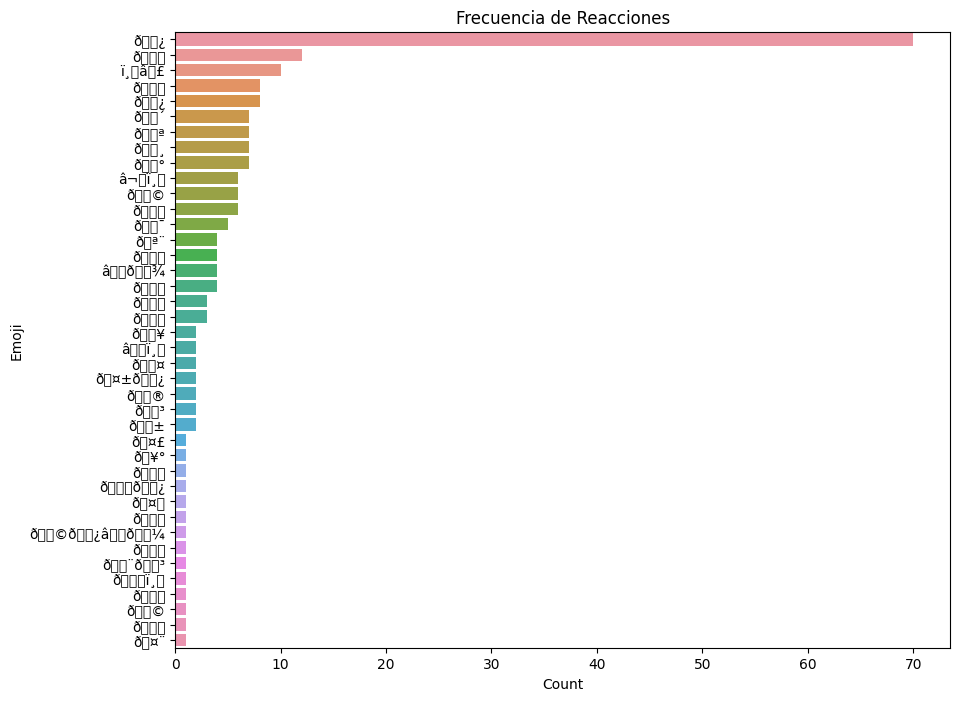

In [46]:
# Convertir el diccionario en un DataFrame para facilitar la visualización
reactions_df = pd.DataFrame(reactions_count.items(), columns=['Emoji', 'Count'])

# Ordenar los datos por conteo y luego graficar
reactions_df = reactions_df.sort_values('Count', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Emoji', data=reactions_df)
plt.title('Frecuencia de Reacciones')
plt.show()

In [47]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Descargar las palabras de parada (stopwords) si aún no lo has hecho
nltk.download('stopwords')
nltk.download('punkt')
negative_words = [
    'bad', 'terrible', 'horrible', 'hate', 'worst', 'sad', 'angry',
    'negative', 'nasty', 'sex', 'awful', 'disgusting', 'displeased',
    'miserable', 'depressed', 'upset', 'disappointing', 'poor', 'harmful',
    'unhappy', 'worthless', 'unpleasant', 'offensive', 'aggressive',
    'hostile', 'jealous', 'nervous', 'scary', 'vicious', 'sinister',
    'evil', 'fear', 'anxious', 'difficult', 'dirty', 'grim', 'cruel',
    'violent', 'scandalous', 'shameful', 'bitter', 'harsh', 'painful',
    'tragic', 'sorrowful', 'toxic', 'dreadful', 'threatening', 'menacing',
    'ominous', 'heavy', 'gloomy', 'melancholy', 'despair', 'rage', 'furious',
    'ruin', 'damaging', 'dangerous', 'defeat', 'fail', 'failure', 'fall',
    'fell', 'drop', 'dropped', 'loss', 'lost', 'missing', 'lack', 'absence',
    'crisis', 'dead', 'death', 'deceit', 'deceive', 'deception', 'deny',
    'denial', 'degrade', 'deplorable', 'depreciate', 'desolate', 'despair',
    'desperate', 'destroy', 'destruction', 'destructive', 'die', 'dismay',
    'disorder', 'disorganized', 'disoriented', 'dispensable', 'dissatisfaction',
    'dissatisfied', 'distress', 'distrust', 'disturbance', 'divisive', 'divorce',
    'dread', 'dreary', 'enrage', 'enraged', 'erode', 'eroding', 'exacerbate',
    'excruciating', 'fail', 'failing', 'flaw', 'flawed', 'flee', 'fled',
    'fright', 'frighten', 'frightful', 'grim', 'guilt', 'guilty', 'harm',
    'harsh', 'harshly', 'hazard', 'hazardous', 'hopeless', 'horrendous',
    'hostility', 'humiliate', 'humiliating', 'hurt', 'hurtful', 'incapable',
    'inclement', 'incompatible', 'inconceivable', 'inconsistency', 'inconsistent',
    'incurable', 'indecent', 'indict', 'ineffective', 'ineffectively', 'inflict',
    'infringe', 'infuriate', 'infuriating', 'injure', 'injurious', 'insanity',
    'insidious', 'insipid', 'insult', 'insulting', 'intense', 'interfere',
    'intimidate', 'intimidating', 'irrational', 'irritate', 'irritating',
    'isolate', 'isolated', 'jeopardy', 'lament', 'languish', 'lapse', 'lethal',
    'lonely', 'lurid', 'mad', 'malicious', 'malign', 'malignant', 'mangle',
    'manipulate', 'manipulative', 'martyrdom', 'miserable', 'misery', 'mislead',
    'misleading', 'mistake', 'mistrust', 'mourn', 'mourning', 'murder', 'nasty',
    'nefarious', 'neglect', 'neglected', 'negligence', 'neurotic', 'nightmare',
    'obnoxious', 'obscene', 'oppress', 'oppression', 'outrage', 'outrageous',
    'overwhelm', 'overwhelming', 'pain', 'painful', 'pandemonium']



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
# Filtrar los comentarios que tienen un sentimiento negativo
#negative_comments = df[df['Sentiment'] < -0.5]['Content'].dropna()

# Tokenizar los comentarios y convertirlos en una lista de palabras
# Eliminar las palabras de parada y la puntuación
# stop_words = set(stopwords.words('english'))
# words = []
# for comment in negative_comments:
#     # Tokeniza y convierte a minúsculas
#     tokens = word_tokenize(comment.lower())
#     # Eliminar palabras de parada y puntuación
#     words.extend([word for word in tokens if word not in stop_words and word not in string.punctuation])

# Contar la frecuencia de cada palabra
word_counts = Counter(words)

# Identificar las palabras negativas más comunes
# Para esto, necesitarías una lista de palabras negativas predefinida o utilizar alguna heurística
negative_word_counts = {word: count for word, count in word_counts.items() if word in negative_words}

# Imprimir las palabras negativas más comunes
print(Counter(negative_word_counts).most_common())

NameError: ignored

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Usar el diccionario 'negative_word_counts' que creaste anteriormente para generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(negative_word_counts)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que VADER esté listo para usarse
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimientos VADER
sid = SentimentIntensityAnalyzer()

# Función para obtener la puntuación de sentimiento de un comentario
def detect_sentiment(text):
    if pd.notna(text):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Asumir neutralidad para comentarios vacíos

# Aplicar la función a todos los comentarios
df['Sentiment_Score'] = df['Content'].apply(detect_sentiment)

# Agregar una columna para categorizar los comentarios
df['Sentiment_Type'] = pd.cut(df['Sentiment_Score'],
                               bins=[-1, -0.05, 0.05, 1],
                               labels=['Negative', 'Neutral', 'Positive'],
                               include_lowest=True)

# Visualizar la distribución de los sentimientos para cada autor
plt.figure(figsize=(15, 5))
sns.countplot(x='Author', hue='Sentiment_Type', data=df)
plt.title('Distribución de los Sentimientos por Autor')
plt.xticks(rotation=90)
plt.show()

# Otra opción es visualizar la distribución de las puntuaciones de sentimiento
sns.histplot(data=df, x='Sentiment_Score', hue='Sentiment_Type', element='step', stat='density', common_norm=False)
plt.title('Distribución de las Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Densidad')
plt.show()

In [ ]:
# Asegúrate de importar las librerías necesarias
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descarga los datos de VADER si aún no lo has hecho
nltk.download('vader_lexicon')

# Inicializa el analizador de sentimientos de VADER
sid = SentimentIntensityAnalyzer()

# Función para calcular el sentimiento de un comentario
def get_sentiment(text):
    if pd.notna(text):
        return sid.polarity_scores(text)['compound']
    else:
        return None  # Retorna None si el texto es NaN

# Aplica la función a la columna 'Content' sin eliminar los NaN para mantener el mismo índice
df['Sentiment'] = df['Content'].apply(get_sentiment)

# Filtra los comentarios con un sentimiento negativo
df['Negative'] = df['Sentiment'] < -0.5

# Agrupa por 'Author' y cuenta los valores negativos
negative_comments_by_author = df.groupby('Author')['Negative'].sum()

print(negative_comments_by_author)

# Modelo

## Modelo pre-entrenado

In [54]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))
stop_words.add("rt")

def remove_entity(raw_text):
    if isinstance(raw_text, str):
        entity_regex = r"&[^\s;]+;"
        text = re.sub(entity_regex, "", raw_text)
        return text
    return raw_text

def change_user(raw_text):
    if isinstance(raw_text, str):
        regex = r"@([^ ]+)"
        text = re.sub(regex, "user", raw_text)
        return text
    return raw_text

def remove_url(raw_text):
    if isinstance(raw_text, str):
        url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
        text = re.sub(url_regex, '', raw_text)
        return text
    return raw_text

def remove_noise_symbols(raw_text):
    if isinstance(raw_text, str):
        text = raw_text.replace('"', '')
        text = text.replace("'", '')
        text = text.replace("!", '')
        text = text.replace("`", '')
        text = text.replace("..", '')
        return text
    return raw_text

def remove_stopwords(raw_text):
    if isinstance(raw_text, str):
        tokenize = nltk.word_tokenize(raw_text)
        text = [word for word in tokenize if not word.lower() in stop_words]
        text = " ".join(text)
        return text
    return raw_text

def remove_emojis(raw_text):
    emoji_regex = r':\S+:'
    text = re.sub(emoji_regex, '', raw_text)
    return text

def preprocess(datas):
    clean = []
    for text in datas:
        clean_text = text
        for func in [change_user, remove_entity, remove_url, remove_noise_symbols, remove_stopwords, remove_emojis]:
            clean_text = func(clean_text)
        clean.append(clean_text)
    return clean

# If string
df['Clean_Content'] = df['Content'].apply(lambda x: preprocess([x])[0] if isinstance(x, str) else x)

df[['Content', 'Clean_Content']].head()

,Content,Clean_Content
Date,,
2021-09-01 02:14:00,ok so,ok
2021-09-01 02:14:00,wait,wait
2021-09-01 02:14:00,wtf,wtf
2021-09-01 02:14:00,LOL,LOL
2021-09-01 02:14:00,HAHAHA,HAHAHA


## Preprocesamiento

## Labeling

In [59]:
df['Toxic'] = df['Content'].apply(lambda x: any(word in str(x) for word in negative_words) if not pd.isna(x) else False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35000 entries, 2021-09-01 02:14:00 to 2021-09-23 15:28:00
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AuthorID       35000 non-null  int64 
 1   Author         35000 non-null  object
 2   Content        34289 non-null  object
 3   Attachments    645 non-null    object
 4   Reactions      719 non-null    object
 5   Clean_Content  34289 non-null  object
 6   Toxic          35000 non-null  bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 1.9+ MB
None


## Load pre-trained model

In [78]:
from keras.models import load_model

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

# Load the pre-trained model
loaded_model = load_model('pretrained.h5', custom_objects={'f1': f1, 'recall': recall, 'precision': precision})

## Tokenization

In [79]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

# Assuming tokenizer and max_length are defined as used during training
clean_text = df['Clean_Content'].astype(str).tolist()
labels = df['Toxic'].astype(int).tolist()

tokenizer.fit_on_texts(clean_text)

clean_text_sequences = tokenizer.texts_to_sequences(clean_text)
max_length = max(len(seq) for seq in clean_text_sequences)
clean_text_padded = pad_sequences(clean_text_sequences, maxlen=max_length)


# Model

In [90]:
from keras.utils import to_categorical
from keras.layers import Dense


X_train, X_test, y_train, y_test = train_test_split(clean_text, labels, test_size=0.2, random_state=42)
model_tokenizer = Tokenizer()
model_tokenizer.fit_on_texts(X_train)

X_train_sequences = model_tokenizer.texts_to_sequences(X_train)
X_test_sequences = model_tokenizer.texts_to_sequences(X_test)
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

loaded_model.pop()
loaded_model.add(Dense(2, activation='softmax'))  # Replace last layer

loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1, precision, recall], run_eagerly=True)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 200)           3333600   
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3410018 (13.01 MB)
Trainable params: 34100

In [91]:
from keras import backend as K

max_length = 28

X_train_sequences_np = np.array(X_train_sequences)
X_test_sequences_np = np.array(X_test_sequences)

X_train_sequences_padded = pad_sequences(X_train_sequences, maxlen=max_length)
X_test_sequences_padded = pad_sequences(X_test_sequences, maxlen=max_length)

X_train_sequences_np = np.array(X_train_sequences_padded)
X_test_sequences_np = np.array(X_test_sequences_padded)

model_history = loaded_model.fit(
    X_train_sequences_np,
    y_train_categorical,
    batch_size=64,
    epochs=10,
    validation_data=(X_test_sequences_np, y_test_categorical)
)

<ipython-input-91-ba5c92ecc5da>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_sequences_np = np.array(X_train_sequences)
<ipython-input-91-ba5c92ecc5da>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_sequences_np = np.array(X_test_sequences)


Epoch 1/10
438/438 [==============================] - 272s 617ms/step - loss: 0.1527 - accuracy: 0.9628 - f1: 0.9628 - precision: 0.9628 - recall: 0.9628 - val_loss: 0.0936 - val_accuracy: 0.9670 - val_f1: 0.9670 - val_precision: 0.9670 - val_recall: 0.9670
Epoch 2/10
429/438 [============================>.] - ETA: 5s - loss: 0.0600 - accuracy: 0.9821 - f1: 0.9821 - precision: 0.9821 - recall: 0.9821

KeyboardInterrupt: ignored

In [ ]:
input_sentence = "bad"

tokenized_sentence = word_tokenize(input_sentence)
tfidf_vectorized = tfidf_vectorizer.transform([" ".join(tokenized_sentence)])
word2vec_embedded = np.mean([word2vec_model.wv[word] for word in tokenized_sentence if word in word2vec_model.wv] or [np.zeros(100)], axis=0)

# Concatenate the features
input_features = np.hstack((tfidf_vectorized.toarray(), word2vec_embedded.reshape(1, -1)))
prediction = model.predict(input_features)
print(prediction)

[ True]
